# EDA PROJECT ON CARS PRICE PREDICTION

### importing libraries

In [1]:
import pandas as pd
import numpy as np

## Importing dataset

In [2]:
data= pd.read_csv('data.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [4]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [5]:
data.columns=data.columns.str.lower().str.replace(" ","_")

In [6]:
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
data.engine_fuel_type.value_counts()

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: engine_fuel_type, dtype: int64

In [8]:
data.market_category.value_counts().head()

Crossover             1110
Flex Fuel              872
Luxury                 855
Luxury,Performance     673
Hatchback              641
Name: market_category, dtype: int64

In [9]:
data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [10]:

round((data.isnull().sum() / (len(data.index)) * 100) , 2)


make                  0.00
model                 0.00
year                  0.00
engine_fuel_type      0.03
engine_hp             0.58
engine_cylinders      0.25
transmission_type     0.00
driven_wheels         0.00
number_of_doors       0.05
market_category      31.41
vehicle_size          0.00
vehicle_style         0.00
highway_mpg           0.00
city_mpg              0.00
popularity            0.00
msrp                  0.00
dtype: float64

# Data cleaning

In [11]:
data['market_category'].fillna(data['market_category'].mode()[0], inplace = True)
data['engine_fuel_type'].fillna(data['engine_fuel_type'].mode()[0], inplace = True)
   

In [12]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_fuel_type      0
engine_hp            69
engine_cylinders     30
transmission_type     0
driven_wheels         0
number_of_doors       6
market_category       0
vehicle_size          0
vehicle_style         0
highway_mpg           0
city_mpg              0
popularity            0
msrp                  0
dtype: int64

In [13]:
data['engine_hp'].fillna(data['engine_hp'].mean(), inplace = True)

In [14]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_fuel_type      0
engine_hp             0
engine_cylinders     30
transmission_type     0
driven_wheels         0
number_of_doors       6
market_category       0
vehicle_size          0
vehicle_style         0
highway_mpg           0
city_mpg              0
popularity            0
msrp                  0
dtype: int64

In [15]:
data['engine_cylinders'].fillna(data['engine_cylinders'].median(), inplace = True)
data['number_of_doors'].fillna(data['number_of_doors'].median(), inplace = True)

In [16]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

# checking for duplicates


In [17]:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())

'Total number of of Duplicates present in data: 715'

In [18]:
# dropping duplicates values
data.drop_duplicates(inplace = True)

display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())

'Total number of of Duplicates present in data: 0'

# finding correlation 

In [19]:
data.corr().style.background_gradient('copper_r')

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
year,1.000000,0.335573,-0.034152,0.247739,0.244972,0.188417,0.085874,0.209635
engine_hp,0.335573,1.000000,0.772510,-0.128917,-0.359993,-0.351397,0.042186,0.658789
engine_cylinders,-0.034152,0.772510,1.000000,-0.149798,-0.596246,-0.562599,0.038325,0.538531
number_of_doors,0.247739,-0.128917,-0.149798,1.000000,0.115081,0.121013,-0.057213,-0.144353
highway_mpg,0.244972,-0.359993,-0.596246,0.115081,1.000000,0.886299,-0.017159,-0.166631
city_mpg,0.188417,-0.351397,-0.562599,0.121013,0.886299,1.000000,-0.000549,-0.162343
popularity,0.085874,0.042186,0.038325,-0.057213,-0.017159,-0.000549,1.000000,-0.048371
msrp,0.209635,0.658789,0.538531,-0.144353,-0.166631,-0.162343,-0.048371,1.000000


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

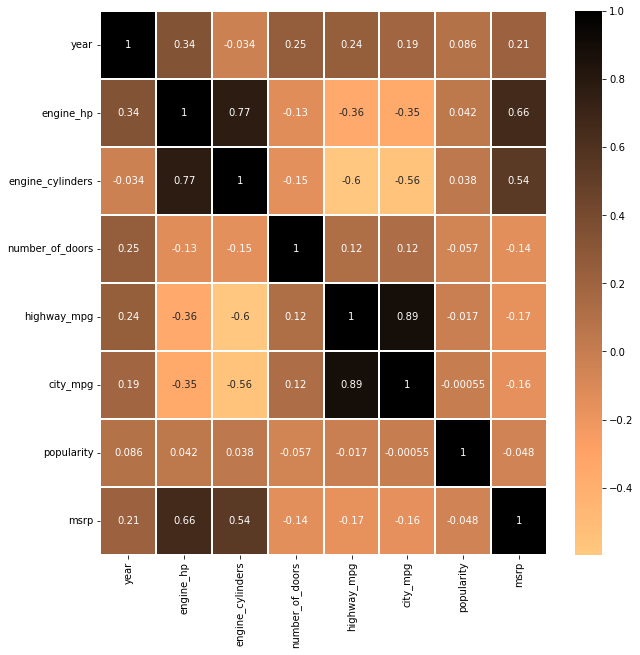

In [21]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(), cmap = 'copper_r', annot = True, lw = 0.1,linewidths=.5, ax=ax);

## Observations

### 1. msrp has correlations with engine_hp and engine_cylinders
### 2. also popularity is correlated with year

# Vehicle production by companies

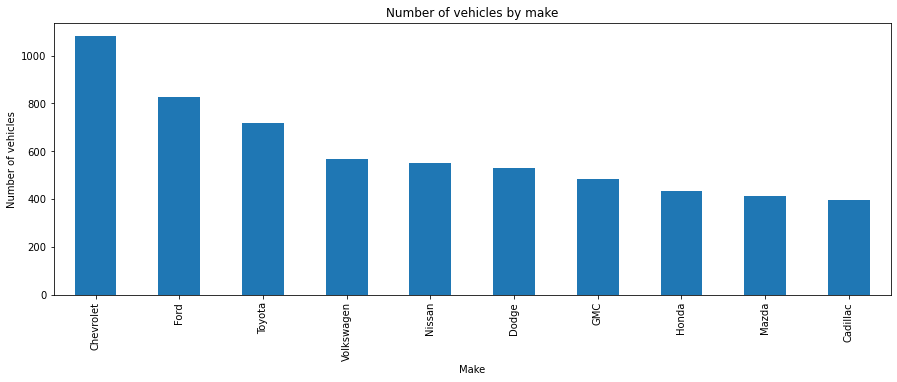

In [22]:
data.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');


## Observation

### Chevrolet has highest numbers of model of cars

# Fuel type

Text(0.5, 0, 'Fuel type')

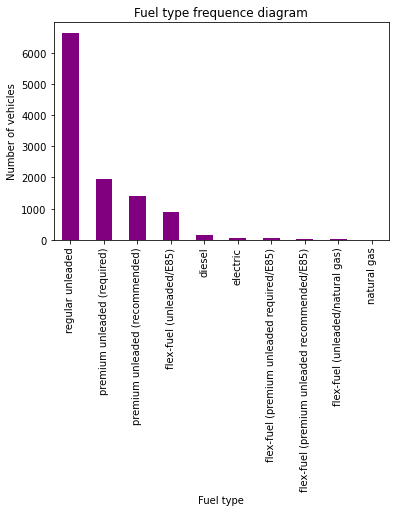

In [23]:
data['engine_fuel_type'].value_counts().plot(kind='bar',color='purple')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type')

## Observation 

### regular unleaded is the most used fuel type
### natural gas is the least used 


In [24]:
data.shape

(11199, 16)

# How many wheel drives

Text(0.5, 0, 'Drive wheels')

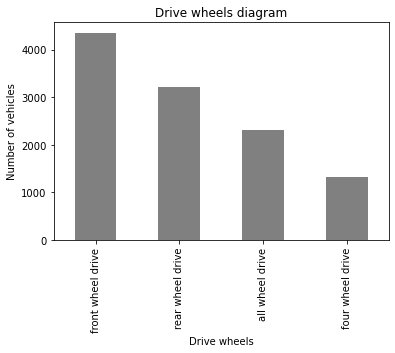

In [25]:
data['driven_wheels'].value_counts().plot(kind='bar',color='grey')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels')

# Number of doors

Text(0.5, 0, 'Number of doors')

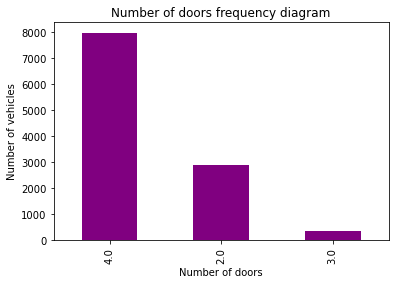

In [26]:
data['number_of_doors'].value_counts().plot(kind='bar',color='purple')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors')

### Three doors vehicles are also there


# Which companies making expensive cars

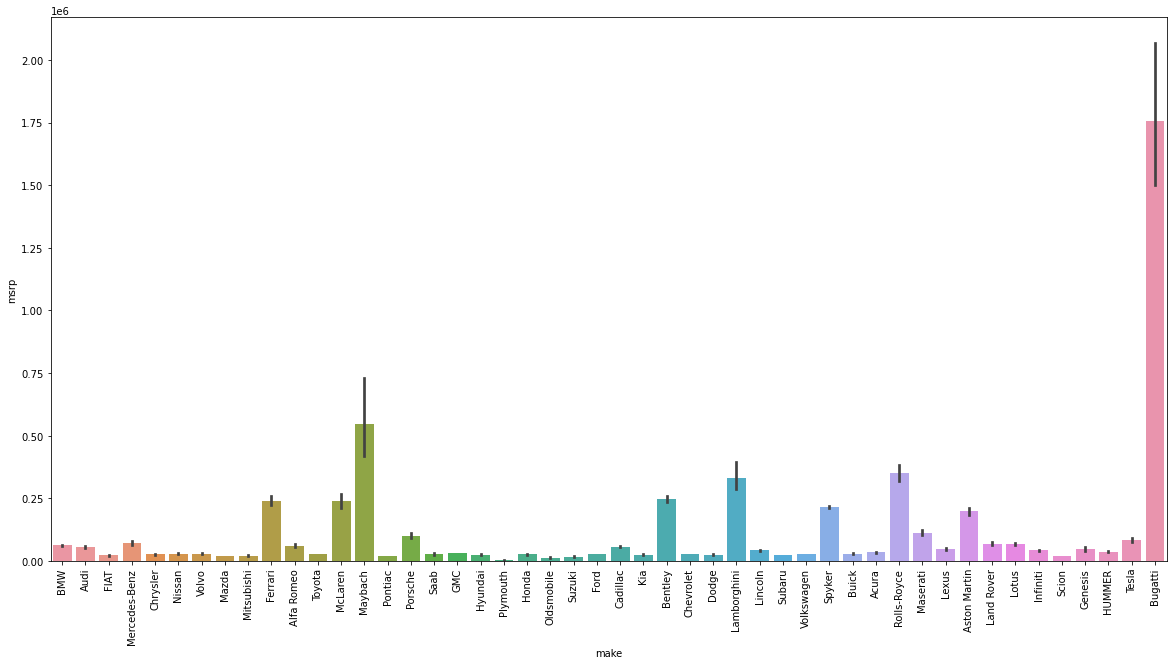

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x='make', y="msrp", data=data)
plt.xticks(rotation = 90)
plt.show()

## Observation
### Buggatti producing most expensive cars
### followed by Maybach and Rolls-Roys

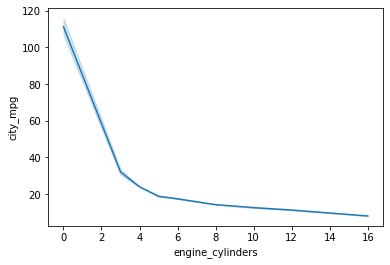

In [30]:
sns.lineplot(data=data,x='engine_cylinders',y='city_mpg')
plt.show()

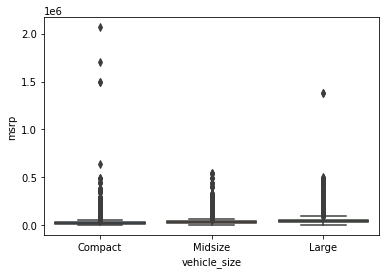

In [39]:
sns.boxplot(data=data,  x='vehicle_size', y='msrp')
plt.show()